In [11]:
from bs4 import BeautifulSoup
from time import sleep
import requests
import pandas as pd
import numpy as np
import re
import datetime
from dateutil.relativedelta import relativedelta, WE
from datetime import datetime,timedelta
from pandas.tseries.offsets import DateOffset, BDay
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import pandas_datareader.data as web
import ffn
import pickle
from io import StringIO

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
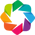

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[20,10]

import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

def set_toolbar_autohide(plot, element):
    bokeh_plot = plot.state
    bokeh_plot.toolbar.autohide = True

In [13]:
path=r'F:\WQU_capstone'

In [14]:
## Download VIX Futures data from CBOE after 2013
mainlink='https://markets.cboe.com/us/futures/market_statistics/historical_data/'
url = requests.get(mainlink).text
soup = BeautifulSoup(url)

cols=['Trade Date','Futures','Open','High','Low','Close','Settle','Change','Total Volume','EFP','Open Interest']
df=pd.DataFrame()
for link in soup.findAll("a",class_='historical-data-link'):
    current_link = link.get("href")
    if (current_link.find('/csv/')!=-1)&(current_link.find('VX')!=-1):
        if(link.text.strip().find('VX+VXT ')!=-1)&(int(re.search('[\d]+',link.text.strip())[0])>13):
            print(current_link)
            df= df.append(pd.read_csv(mainlink+current_link)\
                      ,ignore_index=True)

products/csv/VX/2021-01-20/
products/csv/VX/2021-02-17/
products/csv/VX/2021-03-17/
products/csv/VX/2021-04-21/
products/csv/VX/2021-05-19/
products/csv/VX/2021-06-16/
products/csv/VX/2020-01-22/
products/csv/VX/2020-02-19/
products/csv/VX/2020-03-18/
products/csv/VX/2020-04-15/
products/csv/VX/2020-05-20/
products/csv/VX/2020-06-17/
products/csv/VX/2020-07-22/
products/csv/VX/2020-08-19/
products/csv/VX/2020-09-16/
products/csv/VX/2020-10-21/
products/csv/VX/2020-11-18/
products/csv/VX/2020-12-16/
products/csv/VX/2019-01-16/
products/csv/VX/2019-02-13/
products/csv/VX/2019-03-19/
products/csv/VX/2019-04-17/
products/csv/VX/2019-05-22/
products/csv/VX/2019-06-19/
products/csv/VX/2019-07-17/
products/csv/VX/2019-08-21/
products/csv/VX/2019-09-18/
products/csv/VX/2019-10-16/
products/csv/VX/2019-11-20/
products/csv/VX/2019-12-18/
products/csv/VX/2018-01-17/
products/csv/VX/2018-02-14/
products/csv/VX/2018-03-21/
products/csv/VX/2018-04-18/
products/csv/VX/2018-05-16/
products/csv/VX/2018

In [15]:
## Download VIX Futures data from CBOE before 2014

mainlink2='https://www.cboe.com/products/futures/market-data/historical-data-archive'

url = requests.get(mainlink2).text
soup = BeautifulSoup(url)

df1=pd.DataFrame()
for link in soup.findAll("a"):
    current_link2 = link.get("href")
    if(current_link2!=None):
        if (current_link2.endswith('VX.csv')):
            if (re.search('[\d]+',current_link2)!=None):
                if(int((re.search('[\d]+',current_link2)[0]))<14):
                    print(current_link2)
                    df1= df1.append(pd.read_csv('https://www.cboe.com'+current_link2,names=cols,skiprows=1,header=None)\
                      ,ignore_index=True)

/Publish/ScheduledTask/MktData/datahouse/CFE_F13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_G13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_H13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_J13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_K13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_M13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_N13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_Q13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_U13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_V13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_X13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_Z13_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_F12_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_G12_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_H12_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_J12_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_K12_VX.csv
/Publish/ScheduledTask/MktData/datahouse/CFE_M12

In [16]:
df1=df1[~(df1['Trade Date']=='Trade Date')].copy()
df1['series'] =df1['Futures'].apply(lambda x:x[0])
df1['year']=df1['Futures'].apply(lambda x:int(x[-3:-1])+2000)
df1['month']=df1['Futures'].apply(lambda x:datetime.strptime(x[-7:-4],'%b').month)
df['series'] =df['Futures'].apply(lambda x:x[0])
df['year']=df['Futures'].apply(lambda x:int(x[-6:-1]))
df['month']=df['Futures'].apply(lambda x:datetime.strptime(x[-9:-6],'%b').month)

In [17]:
newdf=df.append(df1)
# newdf.drop_duplicates(subset=cols, inplace=True) ## does not serve intended purpose
newdf.to_csv(path+'\\all_fut_data.csv')

In [18]:
dts= pd.read_excel(path+'\\vix_expirationdts.xlsx')
usbd=CustomBusinessDay(calendar=USFederalHolidayCalendar())
dts['last trading dts']= dts['Expiration dts']-usbd

dts['month']= dts['Expiration dts'].dt.month
dts['year']= dts['Expiration dts'].dt.year

D:\python\myenv\lib\site-packages\pandas\core\arrays\datetimes.py:693: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [19]:
alldf= pd.merge(newdf,dts, left_on=['year','month'],right_on=['year','month'],how='left')

alldf['Trade Date']= pd.to_datetime(alldf['Trade Date'])
alldf['Expiration dts']= pd.to_datetime(alldf['Expiration dts'])
alldf['Settle']= alldf['Settle'].astype(float)

In [20]:
def CMT_VIX_FUTURES(m,alldf):
    cutoffdate=pd.to_datetime('2006-11-14') ## cut off date for first month futures is 2006-09-19
    last=cutoffdate

    idx= pd.DataFrame (columns=['date','c1','c2','last_exp','lasttrade_dt','c1_wt','c2_wt','c1_px','c2_px','c1_open','cdr','indexlevel','prev_c1_wt','rollcost'])
    idx['date']=alldf[alldf['Trade Date'] >= cutoffdate]['Trade Date'].unique()##earlier was set at 2005-12-20

    idx.sort_values(by='date',inplace=True)

    idx.set_index('date',inplace=True)

    for i in idx.index:
        getfwdcontracts= alldf[alldf['Expiration dts']>i].sort_values(by='Expiration dts')[['Futures','Expiration dts','last trading dts']].drop_duplicates()
        getprevcontracts= alldf[alldf['Expiration dts']<=i].sort_values(by='Expiration dts',ascending=False)[['Futures','Expiration dts','last trading dts']].drop_duplicates()
        idx.loc[i,'c1']= getfwdcontracts.iloc[m-1,getfwdcontracts.columns.get_loc('Futures')]
        idx.loc[i,'c2']= getfwdcontracts.iloc[m,getfwdcontracts.columns.get_loc('Futures')]
        idx.loc[i,'last_exp']=getprevcontracts.iloc[0,getprevcontracts.columns.get_loc('Expiration dts')]
        idx.loc[i,'lasttrade_dt']=getfwdcontracts.iloc[0,getfwdcontracts.columns.get_loc('last trading dts')]

        days_remaining= len(pd.date_range(start=i,end=idx.loc[i,'lasttrade_dt'],freq=usbd))
        total_days= len(pd.date_range(start=idx.loc[i,'last_exp'],end=idx.loc[i,'lasttrade_dt'],freq=usbd))

        idx.loc[i,'c1_wt']= days_remaining/total_days
        idx.loc[i,'c2_wt']= 1-days_remaining/total_days

        try:
            idx.loc[i,'c1_px']= alldf.loc[((alldf.Futures==idx.loc[i,'c1'])&(alldf['Trade Date']==i)),'Settle'].values[0]
        except:
            idx.loc[i,'c1_px']=np.NaN
        try:
            idx.loc[i,'c2_px']= alldf.loc[((alldf.Futures==idx.loc[i,'c2'])&(alldf['Trade Date']==i)),'Settle'].values[0]
        except:
            idx.loc[i,'c2_px']=np.NaN

        if(days_remaining==total_days):
            idx.loc[i,'c1_open']= idx.loc[last,'c2_px']
            idx.loc[i,'cdr']=idx.loc[i,'c1_wt']* idx.loc[i,'c1_px']/idx.loc[i,'c1_open']
            
            idx.loc[i,'prev_c1_wt']= idx.loc[last,'c2_wt']

        else:
            idx.loc[i,'c1_open']= idx.loc[last,'c1_px']
            idx.loc[i,'cdr']=idx.loc[i,'c1_wt']* idx.loc[i,'c1_px']/idx.loc[i,'c1_open']+ idx.loc[i,'c2_wt']*idx.loc[i,'c2_px']/idx.loc[last,'c2_px']
            
            idx.loc[i,'prev_c1_wt']= idx.loc[last,'c1_wt']
        
        if(i!=idx.index[0]):
            idx.loc[last,'rollcost']= (idx.loc[last,'c2_px']-idx.loc[last,'c1_px'])/idx.loc[last,'c2_px']*np.abs(idx.loc[i,'c1_wt']-idx.loc[i,'prev_c1_wt'])

        
        if(i==idx.index[0]):
            idx.loc[i,'indexlevel']=100000
        else:
            idx.loc[i,'indexlevel']= idx.loc[last,'indexlevel']*idx.loc[i,'cdr']
        
        last =i
    
    idx= idx.rename(columns={'indexlevel':str(m)+'M_'+'ER','rollcost':'rollcost_'+str(m)+'M'})
        
    return idx

In [21]:
dfdict={}
for i in range(4):
    dfdict[str(i+1)+'MER']= CMT_VIX_FUTURES(i+1,alldf)

In [22]:
vix_idxs=pd.concat([dfdict[str(i+1)+'MER'][str(i+1)+'M_'+'ER'] for i in range(4)],axis=1,join='inner')
rollcosts= pd.concat([dfdict[str(i+1)+'MER']['rollcost_'+str(i+1)+'M'] for i in range(4)],axis=1,join='inner')

In [51]:
vix_idxs[vix_idxs.index>pd.to_datetime('2008-01-01')].hvplot.line(frame_width=700,frame_height=400).opts(hooks=[set_toolbar_autohide], backend='bokeh',legend_position='top_right',fontsize={'legend':7})

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [24]:
def CMT_VIX_FUTURES_MT(m,alldf):
    cutoffdate=pd.to_datetime('2008-05-20')##earlier was set at 2005-12-20
    last=cutoffdate

    idx= pd.DataFrame (columns=['date','c1','c2','c3','c4','last_exp','lasttrade_dt','c1_wt','c2_wt','c3_wt','c4_wt'\
                                ,'c1_px','c2_px','c3_px','c4_px','c1_open','c2_open','c3_open'\
                                ,'cdr','indexlevel','prev_c1_wt','rollcost'])
    idx['date']=alldf[alldf['Trade Date'] >= cutoffdate]['Trade Date'].unique()

    idx.sort_values(by='date',inplace=True)
    idx.loc[idx.index[0],'indexlevel']=100000

    idx.set_index('date',inplace=True)

    for i in idx.index:
        getfwdcontracts= alldf[alldf['Expiration dts']>i].sort_values(by='Expiration dts')[['Futures','Expiration dts','last trading dts']].drop_duplicates()
        getprevcontracts= alldf[alldf['Expiration dts']<=i].sort_values(by='Expiration dts',ascending=False)[['Futures','Expiration dts','last trading dts']].drop_duplicates()
        idx.loc[i,'c1']= getfwdcontracts.iloc[m-1,getfwdcontracts.columns.get_loc('Futures')]
        idx.loc[i,'c2']= getfwdcontracts.iloc[m,getfwdcontracts.columns.get_loc('Futures')]
        idx.loc[i,'c3']= getfwdcontracts.iloc[m+1,getfwdcontracts.columns.get_loc('Futures')]
        idx.loc[i,'c4']= getfwdcontracts.iloc[m+2,getfwdcontracts.columns.get_loc('Futures')]
        
        idx.loc[i,'last_exp']=getprevcontracts.iloc[0,getprevcontracts.columns.get_loc('Expiration dts')]
        idx.loc[i,'lasttrade_dt']=getfwdcontracts.iloc[0,getfwdcontracts.columns.get_loc('last trading dts')]

        days_remaining= len(pd.date_range(start=i,end=idx.loc[i,'lasttrade_dt'],freq=usbd))
        total_days= len(pd.date_range(start=idx.loc[i,'last_exp'],end=idx.loc[i,'lasttrade_dt'],freq=usbd))

        idx.loc[i,'c1_wt']= days_remaining/total_days* (1/3)
        idx.loc[i,'c4_wt']= (1/3)*(1-days_remaining/total_days)
        idx.loc[i,'c2_wt']= (1/3)
        idx.loc[i,'c3_wt']= (1/3)

        try:
            idx.loc[i,'c1_px']= alldf.loc[((alldf.Futures==idx.loc[i,'c1'])&(alldf['Trade Date']==i)),'Settle'].values[0]
        except:
            idx.loc[i,'c1_px']=np.NaN
        try:
            idx.loc[i,'c2_px']= alldf.loc[((alldf.Futures==idx.loc[i,'c2'])&(alldf['Trade Date']==i)),'Settle'].values[0]
        except:
            idx.loc[i,'c2_px']=np.NaN
            
        try:
            idx.loc[i,'c3_px']= alldf.loc[((alldf.Futures==idx.loc[i,'c3'])&(alldf['Trade Date']==i)),'Settle'].values[0]
        except:
            idx.loc[i,'c3_px']=np.NaN
            
        try:
            idx.loc[i,'c4_px']= alldf.loc[((alldf.Futures==idx.loc[i,'c4'])&(alldf['Trade Date']==i)),'Settle'].values[0]
        except:
            idx.loc[i,'c4_px']=np.NaN



        if(days_remaining==total_days):
            idx.loc[i,'c1_open']= idx.loc[last,'c2_px']
            idx.loc[i,'c2_open']= idx.loc[last,'c3_px']
            idx.loc[i,'c3_open']= idx.loc[last,'c4_px']
            
            idx.loc[i,'cdr']=idx.loc[i,'c1_wt']* idx.loc[i,'c1_px']/idx.loc[i,'c1_open']+\
            idx.loc[i,'c2_wt']* idx.loc[i,'c2_px']/idx.loc[i,'c2_open']+\
            idx.loc[i,'c3_wt']* idx.loc[i,'c3_px']/idx.loc[i,'c3_open']
            
            idx.loc[i,'prev_c1_wt']= idx.loc[last,'c4_wt']
            
        else:
            idx.loc[i,'c1_open']= idx.loc[last,'c1_px']
            idx.loc[i,'c2_open']= idx.loc[last,'c2_px']
            idx.loc[i,'c3_open']= idx.loc[last,'c3_px']
            
            idx.loc[i,'cdr']= idx.loc[i,'c1_wt']* idx.loc[i,'c1_px']/idx.loc[i,'c1_open']+\
            idx.loc[i,'c2_wt']* idx.loc[i,'c2_px']/idx.loc[i,'c2_open']+\
            idx.loc[i,'c3_wt']* idx.loc[i,'c3_px']/idx.loc[i,'c3_open']+\
            idx.loc[i,'c4_wt']* idx.loc[i,'c4_px']/idx.loc[last,'c4_px']
            
            idx.loc[i,'prev_c1_wt']= idx.loc[last,'c1_wt']
        
        if(i!=idx.index[0]):
            idx.loc[last,'rollcost']= (idx.loc[last,'c4_px']-idx.loc[last,'c1_px'])/idx.loc[last,'c4_px']*np.abs(idx.loc[i,'c1_wt']-idx.loc[i,'prev_c1_wt'])
        
        if(i==idx.index[0]):
            idx.loc[i,'indexlevel']=100000
        else:
            idx.loc[i,'indexlevel']= idx.loc[last,'indexlevel']*idx.loc[i,'cdr']
            
        last =i

    idx= idx.rename(columns={'indexlevel':'4M_MediumTerm'+'ER','rollcost':'rollcost_4MMT'})

    return idx

In [25]:
dfdict['4M_MTER']=CMT_VIX_FUTURES_MT(4,alldf)

In [26]:
vix_idxs=vix_idxs.join(dfdict['4M_MTER']['4M_MediumTermER'],how='inner')
rollcosts= rollcosts.join(dfdict['4M_MTER']['rollcost_4MMT'],how='inner')

In [27]:
alldfcopy= alldf[alldf['Expiration dts'].notna()].copy()
alldfcopy['Trade Date']=alldfcopy['Trade Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

def plotter(date='2006-11-14'):
    snap= alldfcopy[alldfcopy['Trade Date']==date]
    snap.sort_values(by='Expiration dts',inplace=True)
    snap.rename(columns={'Settle':'Settement Price','Futures':'Futures Series'},inplace=True)
    plot = hv.Curve(snap,vdims='Settement Price',kdims='Futures Series').options(color='red',line_width=2)
    return plot

%opts Curve [width=650, height=400]
hv.DynamicMap(plotter, kdims='date', label="Term Structure of VIX Futures").redim.values(date=alldfcopy['Trade Date'].sort_values(ascending=False).unique())

D:\python\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\python\myenv\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


:DynamicMap   [date]
   :Curve   [Futures Series]   (Settement Price)

In [28]:
b=pd.read_excel(r'http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixarchive.xls',skiprows=1)
a=pd.read_csv(r'http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv',skiprows=1,parse_dates=['Date'])

vix=b.append(a,ignore_index=True).set_index('Date')
vix.rename(columns={'VIX Close':'VIX'},inplace=True)

In [29]:
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews import opts

curve= hv.Curve(vix['VIX'])
scatter=hv.Scatter(rolling_outlier_std(curve,rolling_window=7500,min_periods=1250,sigma=2))
spike=hv.Spikes(scatter)

curve*scatter*spike.opts(color='pink',alpha=2,width=800,height=500)

:Overlay
   .Curve.I   :Curve   [Date]   (VIX)
   .Scatter.I :Scatter   [Date]   (VIX)
   .Spikes.I  :Spikes   [Date]   (VIX)

In [30]:
vix.hvplot.kde(y='VIX',width=700,height=500,title='KDE of VIX Index Levels')

:Distribution   [VIX]   (Density)

In [31]:
## Extract data (Closing px adj for splits and dividends) from Yahoo finance
start_dt=pd.to_datetime('1990-01-01')
SPX = web.DataReader('SPY', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'SPY'})

In [32]:
all_idxs=ffn.core.rebase(pd.concat([vix_idxs,vix['VIX'],SPX['SPY']],join='inner',axis=1),value=100000)

In [33]:
all_idxs=ffn.core.rebase(vix_idxs.join(vix['VIX'],how='left').join(SPX['SPY'],how='left').fillna(method='ffill'),value=100000)

In [56]:
all_idxs.hvplot.line(y=[str(i+1)+'M_ER' for i in range(4)]+['4M_MediumTermER','SPY','VIX'],width=1000, height=500).opts(hooks=[set_toolbar_autohide], backend='bokeh',legend_position='top_right',fontsize={'legend':7})

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [63]:
((rollcosts/1e-4).dropna(how='all')).hvplot.line(y=['rollcost_4M','rollcost_4MMT'],title='Roll Costs of 4M CMT VIX Futures vs  Medium Term CMT VIX Futures Index',ylabel='Roll cost in bps',width=1000, height=500).opts(hooks=[set_toolbar_autohide], backend='bokeh',legend_position='top_right',fontsize={'legend':7})\
*hv.HLine(0).opts(color='black',line_dash='dashed',alpha=0.2)

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .HLine.I     :HLine   [x,y]

In [58]:
(rollcosts/1e-4).mean()

rollcost_1M      23.020880
rollcost_2M      13.638555
rollcost_3M       8.875511
rollcost_4M       7.437473
rollcost_4MMT     6.218648
dtype: float64

In [37]:
##Pickle all the vix as constant matuurity vix futures index levels, along with all other relevant data
pickle_vix = open(path+"\\VIX_indexes.pkl","wb")
pickle_alldata = open(path+"\\alldata_dict.pkl",'wb')
pickle_rollcosts= open(path+"\\rollcosts.pkl",'wb')
pickle.dump(all_idxs, pickle_vix)
pickle.dump(dfdict,pickle_alldata)
pickle.dump((rollcosts/1e-4).dropna(how='all'),pickle_rollcosts)
pickle_vix.close()
pickle_alldata.close()
pickle_rollcosts.close()

In [38]:
## VSTOXX data
s2= requests.get('https://www.stoxx.com/document/Indices/Current/HistoricalData/h_v2tx.txt').text
vstoxx=pd.read_csv(StringIO(s2),sep=';').drop(columns='Symbol').rename(columns={'Indexvalue':'VSTOXX'})

s=requests.get('https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vst1me.txt').text
vst1me=pd.read_csv(StringIO(s),sep=';',skiprows=1)
s1= requests.get('https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vmt5me.txt').text
vmt5me=pd.read_csv(StringIO(s1),sep=';',skiprows=1)

# pd.read_csv('https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vst1me.txt',sep=';',encoding='utf-8')

vst1me['Date']= pd.to_datetime(vst1me['Date'])
vmt5me['Date']= pd.to_datetime(vmt5me['Date'])
vstoxx['Date']= pd.to_datetime(vstoxx['Date'])


STOXX = web.DataReader('^STOXX50E', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'STOXX'})

vstoxx= pd.concat([STOXX,vstoxx.set_index('Date'),vst1me.set_index('Date'),vmt5me.set_index('Date')],join='inner',axis=1)

pickle_vstoxx= open(path+"\\VSTOXX_indexes.pkl","wb")
pickle.dump(vstoxx, pickle_vstoxx)
pickle_vstoxx.close()